In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as mtb

In [3]:
diab=datasets.load_diabetes()

In [4]:
diab

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
import pandas as pd

In [6]:
dataset=pd.DataFrame(diab.data)

In [7]:
dataset.columns=diab.feature_names

In [8]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
#Independent features
X=dataset
#Dependent features--what we want
y=diab.target

In [10]:
#Training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [11]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
357,-0.060003,0.050680,0.049840,0.018430,-0.016704,-0.030124,-0.017629,-0.002592,0.049770,-0.059067
327,0.074401,-0.044642,0.114509,0.028758,0.024574,0.024991,0.019187,-0.002592,-0.000612,-0.005220
259,0.012648,-0.044642,-0.036385,0.042529,-0.013953,0.012934,-0.026833,0.005157,-0.043984,0.007207
47,-0.078165,-0.044642,-0.073030,-0.057313,-0.084126,-0.074277,-0.024993,-0.039493,-0.018114,-0.083920
279,0.038076,0.050680,-0.024529,0.004658,-0.026336,-0.026366,0.015505,-0.039493,-0.015999,-0.025930
...,...,...,...,...,...,...,...,...,...,...
95,-0.070900,-0.044642,-0.057941,-0.081413,-0.045599,-0.028871,-0.043401,-0.002592,0.001148,-0.005220
32,0.034443,0.050680,0.125287,0.028758,-0.053855,-0.012900,-0.102307,0.108111,0.000272,0.027917
380,0.016281,-0.044642,0.026128,0.058608,-0.060735,-0.044215,-0.013948,-0.033958,-0.051404,-0.025930
131,-0.096328,-0.044642,-0.069797,-0.067642,-0.019456,-0.010708,0.015505,-0.039493,-0.046883,-0.079778


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
X_train=scaler.fit_transform(X_train) ##fit_transform is used on training data to understand the scaling/ transform parameters for the data

In [14]:
X_test=scaler.transform(X_test)

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [16]:
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [17]:
mse=cross_val_score(lreg,X_train,y_train,scoring='neg_mean_squared_error',cv=25)

In [18]:
np.mean(mse)

-3319.4450372311526

In [19]:
reg_test=lreg.predict(X_test)

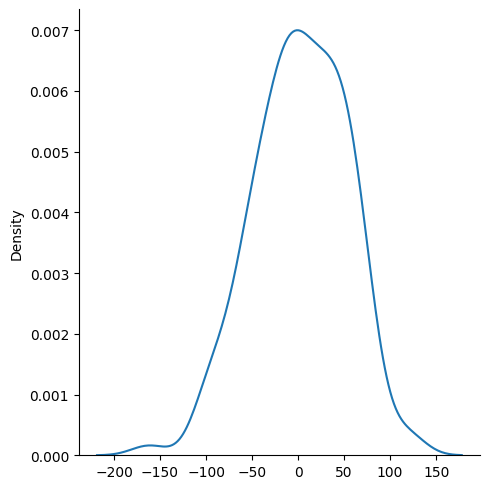

In [20]:
import seaborn as sns
sns.displot(reg_test-y_test,kind='kde')

In [21]:
from sklearn.metrics import r2_score

In [22]:
score=r2_score(y_test,reg_test)

In [23]:
score

0.5326715876099555

In [25]:
lreg.intercept_

150.9093851132686